In [374]:
import random
import numpy as np
import math
import itertools
import matplotlib.pyplot as plt

## Creating random locations

In [375]:
def Create_locations(x,y,n):
    locations= []
    for i in range(n):
        loc_x = random.uniform(0,x)
        loc_y = random.uniform(0,y)
        locations.append([loc_x,loc_y])
    return locations

Create_locations(30,20,5)

[[16.532057703187842, 13.602683254353408],
 [5.615856246870697, 16.153229595831693],
 [20.257269485307543, 10.319718507091],
 [13.691047272944466, 12.20424014318959],
 [2.9871827076205806, 14.153646504534743]]

## Distance Calculation

In [376]:
def calculate_euclidean_distance(pt1, pt2):
    pt1 = np.array(pt1)
    pt2 = np.array(pt2)
    return np.sqrt(np.sum((pt2 - pt1)**2))

def calculate_manhattan_distance(point1, point2):
    
    return abs(point1[0] - point2[0]) + abs(point1[1] - point2[1])

In [377]:
def calculate_total_distance(DP_candidate, delivery_locations, k):
    k = k[0][0]
    total_euclidean_distance = 0
    total_manhattan_distance = 0
    if DP_candidate[0]<=k:
        for delivery_location in delivery_locations:
            if delivery_location[0] <= k:
                total_euclidean_distance += calculate_euclidean_distance(DP_candidate, delivery_location)
            else:
                total_euclidean_distance += calculate_euclidean_distance(DP_candidate, (k,delivery_location[1]))
                total_manhattan_distance += calculate_manhattan_distance((k,delivery_location[1]), delivery_location)

    
    else:
        for delivery_location in delivery_locations:
            if delivery_location[0] > k:
                total_manhattan_distance += calculate_manhattan_distance(DP_candidate, delivery_location)
            else:
                total_manhattan_distance += calculate_manhattan_distance(DP_candidate, (k,DP_candidate[1]))
                total_euclidean_distance += calculate_euclidean_distance((k, DP_candidate[1]), delivery_location)
    
    
    return total_euclidean_distance + total_manhattan_distance

## DP Creation algorithms

In [378]:
def gec(coordinates):
    x_sum = sum(loc[0] for loc in coordinates)
    y_sum = sum(loc[1] for loc in coordinates)
    x_cord = x_sum / len(coordinates)
    y_cord = y_sum / len(coordinates)

    return x_cord, y_cord

def gmm(coordinate):
    x_axis = []
    y_axis = []
    centroid = []

    for i in coordinate:
        x_axis.append(i[0])
        y_axis.append(i[1])

    centroid.append(np.median(x_axis))
    centroid.append(np.median(y_axis))

    return centroid

In [379]:
def ecmb(coordinate, border):
    longitude = 0
    latitude = 0
    k=border[0][0]
    # test = gec(coordinate)
    for loc in coordinate:
        if loc[0] <= k:
            longitude+= loc[0]
        else:
            longitude+= k
        latitude+= loc[1]
    x_axis = longitude/len(coordinate)
    y_axis = latitude/len(coordinate)
    return x_axis, y_axis

In [380]:
def calculate_manhattan_median(centroids):
    x = [i for i,j in centroids]
    y = [j for i,j in centroids]

    loc_x = np.median(x)
    loc_y = np.median(y)

    return loc_x, loc_y

def mmeb(customer_locations, border_position):
    R = border_position[0][0]

    euclidean_locations = [(x, y) for x, y in customer_locations if x <= R]
    manhattan_locations = [(x, y) for x, y in customer_locations if x > R]

    best_median_row = None
    best_median_column = None
    best_total_cost = math.inf

    possible_positions = np.linspace(border_position[0][1], border_position[1][1], num=100)

    # Iterate over possible distinct positions on the border
    for i in possible_positions:

        projected_euclidean = [(R, i) for _, _ in euclidean_locations]

        combined_customers = projected_euclidean + manhattan_locations

        median_row, median_column = calculate_manhattan_median(combined_customers)

        total_cost = sum(math.sqrt((x-R)**2 + (y-i)**2) for x,y in euclidean_locations) #cost from euclidian to border
        total_cost += sum(abs(x-median_row) + abs(y-median_column) for x,y in combined_customers) #cost from border to manhattan

        # Update the best result if the current position is better
        if total_cost < best_total_cost:
            # best_border_point = projected_euclidean[0]
            best_total_cost = total_cost
            best_median_row = median_row
            best_median_column = median_column

    return [best_median_row, best_median_column],best_total_cost

## Exhaustive Search

In [381]:
def frange(start, stop, step):
    while start < stop:
        yield round(start, 4)
        start += step

In [382]:
def exhaustive_search(delivery_locations, k, x, y):
    x = [i for i,j in delivery_locations]
    y = [j for i,j in delivery_locations]

    min_x = min(x)
    max_x = max(x)
    min_y = min(y)
    max_y = max(y)

    min_distance = float('inf')
    optimal_DP = None
    
    for x in frange(min_x,max_x,0.1):
        for y in frange(min_y, max_y,0.1):

            total_distance = calculate_total_distance((x,y), delivery_locations, k)
        
            if total_distance < min_distance:
                min_distance = total_distance
                optimal_DP = (x,y)
    
    return optimal_DP, 2*min_distance

## Main

In [383]:
n = 5
x = 10.0
y = 10.0
border = [[5.0,0.0],[5.0,10.0]]

delivary_locations = Create_locations(x,y,n)

delivary_locations

[[3.9820344601436384, 3.4592032073571435],
 [8.146209915308049, 7.138736622101157],
 [7.589708077292427, 1.832042923996996],
 [0.5214169582996608, 4.92138013276616],
 [0.04697790602510743, 7.7940426393101045]]

In [384]:
euclidean_count = sum(1 for loc in delivary_locations if loc[0] <= border[0][0])
manhattan_count = len(delivary_locations) - euclidean_count

euclidean_count, manhattan_count

(3, 2)

In [385]:
gec_dp = gec(delivary_locations)
gmm_dp = gmm(delivary_locations)
ecmb_dp = ecmb(delivary_locations, border)
mmeb_dp, mmeb_distance = mmeb(delivary_locations, border)
optimal_dp, optimal_distance = exhaustive_search(delivary_locations,border,x,y)

print(gec_dp)
print(gmm_dp)
print(ecmb_dp)
print(mmeb_dp)
print(optimal_dp)

(4.0572694634137765, 5.029081105106313)
[3.9820344601436384, 4.92138013276616]
(2.910085864893681, 5.029081105106313)
[5.0, 4.444444444444445]
(3.247, 4.532)


In [386]:
gec_distance = 2*calculate_total_distance(gec_dp,delivary_locations,border)
gmm_distance = 2*calculate_total_distance(gmm_dp,delivary_locations,border)
ecmb_distance = 2*calculate_total_distance(ecmb_dp,delivary_locations,border)
mmeb_distance = 2 * mmeb_distance

print(gec_distance,',',gmm_distance,',',ecmb_distance,',',mmeb_distance,',',optimal_distance,sep="")

42.720040650479405,42.446707104173626,41.59462896378619,45.88501123781633,41.43936283081425


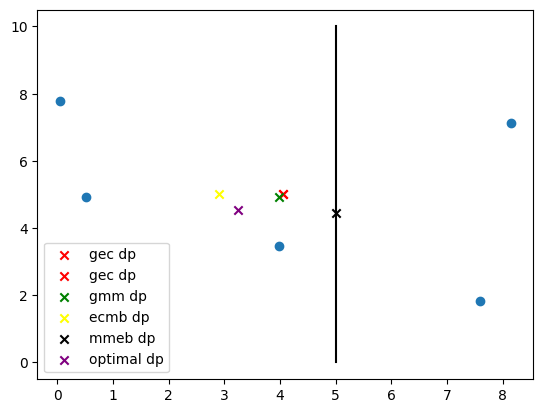

In [387]:
delivary_locations = np.array(delivary_locations)
border = np.array(border)

plt.scatter(delivary_locations[:,0],delivary_locations[:,1])
plt.plot((border[0][0],border[1,0]),(border[0][1],border[1][1]),c='black')
plt.scatter(gec_dp[0],gec_dp[1],marker='x',c='red',label="gec dp")
plt.scatter(gec_dp[0],gec_dp[1],marker='x',c='red',label="gec dp")
plt.scatter(gmm_dp[0],gmm_dp[1],marker='x',c='green',label="gmm dp")
plt.scatter(ecmb_dp[0],ecmb_dp[1],marker='x',c='yellow',label="ecmb dp")
plt.scatter(mmeb_dp[0],mmeb_dp[1],marker='x',c='black',label="mmeb dp")
plt.scatter(optimal_dp[0],optimal_dp[1],marker='x',c='purple',label="optimal dp")
plt.legend()
plt.show()